In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 
# Load the dataset from the csv file using pandas 
# best way is to mount the drive on colab and 
# copy the path for the csv file 
data = pd.read_csv("creditcard.csv") 

In [2]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [3]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing 
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 

(284807, 30)
(284807,)


In [4]:
# Using Skicit-learn to split data into training and testing sets 
#from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
#xTrain, xTest, yTrain, yTest = train_test_split( 
#		xData, yData, test_size = 0.2, random_state = 42) 

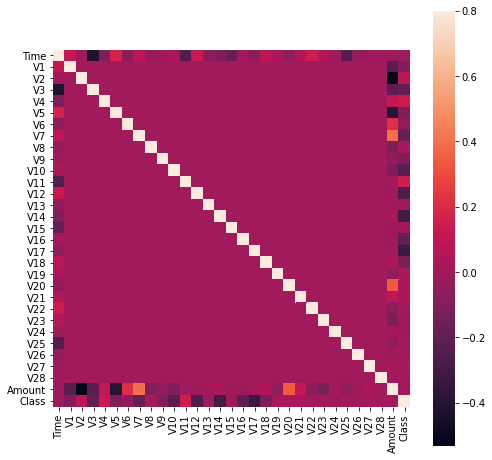

In [5]:
corrmat = data.corr() 
fig = plt.figure(figsize = (8,8)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In [14]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=outlierFraction)
yPred = clf.fit_predict(xTest)
yPred[yPred == 1] = 0
yPred[yPred == -1] = 1


The model used is LOCAL OUTLIER FACTOR
The accuracy is 0.9965766651451845


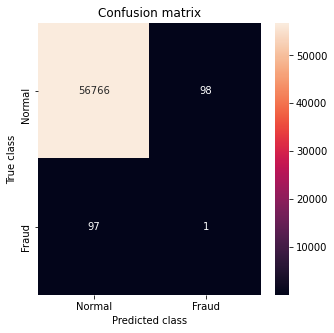

In [15]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is LOCAL OUTLIER FACTOR") 

acc_LOF= accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc_LOF)) 



# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(5,5)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, 
			yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 


In [17]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = len(xTrain),contamination = outlierFraction).fit(xTrain)
y_pred = clf.predict(xTrain)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [26]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
n_outliers = len(fraud) 



print("The model used is ISOLATION Forest classifier") 


print(accuracy_score(yTest, y_pred)) 


The model used is ISOLATION Forest classifier


ValueError: Found input variables with inconsistent numbers of samples: [56962, 227845]